In [1]:
import numpy as np, matplotlib.pyplot as plt
import sys; sys.path.append("../src2")
from pendulum import *

In [2]:
x0 = np.array([0,0,np.pi,0])
xf = np.array([0,0,0,0])
dv = np.hstack(([10], np.random.uniform(-1, 1, 4)))

In [3]:
dv, feas, t, y, u = solve(x0, xf, 0, dv=[10.24919222,  0.19457643,  0.75414392,  0.96063895,  0.84714559], Tlb=7, Tub=15, atol=1e-8, rtol=1e-8)
dv

array([ 9.90337594,  0.        , -0.10327065,  0.63199319,  1.11875127])

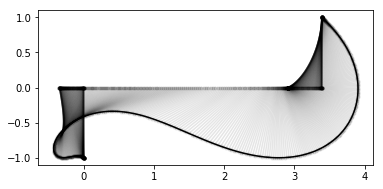

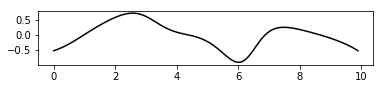

In [4]:
plot_traj(y, arm=True)
plot_controls(t, u)

In [5]:
res = random_walks(t, y, 0, 5, 20, 5, iter=10, dxmax=0.1, fname="energy_walks_transverse.npy")

Point 0
Point 0
Point 0
Point 0
Point 1
Point 1
Point 0
Point 2
Point 0
Point 1
Point 3
Point 1
Point 1
Point 2
Point 4
Point 2
Point 2
Point 5
Point 3
Point 3
Point 2
Point 3
Point 4
Point 3
Point 4
Point 4
Point 4
Point 4
Point 5
Point 5
Point 6
Point 4
Point 4
Point 7
Point 5
Point 5
Point 5
Point 8
Point 6
Point 6
Point 5
Point 7
Point 6
Point 8
Point 8
Point 6
Point 5
Point 9
Point 8
Point 6
Point 7
Point 10
Point 7
Point 8
Point 8
Point 8
Point 9
Point 10
Point 9
Point 8
Point 9
Point 11
Point 9
Point 12
Point 8
Point 9
Point 10
Point 13
Point 9
Point 10
Point 8
Point 9
Point 11
Point 9
Point 13
Point 10
Point 14
Point 9
Point 11
Point 10
Point 10
Point 12
Point 11
Point 14
Point 13
Point 12
Point 15
Point 10
Point 12
Point 16
Point 11
Point 13
Point 13
Point 17
Point 14
Point 11
Point 18
Point 14
Point 14
Point 12
Point 19
Point 15
Point 19
Point 15
Point 0
Point 14
Point 12
Point 16
Point 15
Point 17
Point 17
Point 0
Point 12
Point 15
Point 1
Point 18
Point 13
Point 16
Point 2


In [ ]:
res = np.load("energy_walks_transverse.npy")
ax1 = plot_traj(y, arm=True)
ax2 = plot_controls(t, u)
for r in res:
    traj = r[:,1:-1]
    plot_traj(traj, ax=ax1, alpha=0.1)
    plot_controls(r[:,0], r[:,-1], ax=ax2, alpha=0.1)

In [ ]:
perc = mlp([3, 20, 20, 20, 1])

In [ ]:
ax = plot_controls(t, u)
ax = plot_controls(t, perc.predict(y[:,1:4]), ax=ax)

In [ ]:
dat = np.vstack((y[:,:4].T, u)).T
dat = data(dat, [1,2,3], [4])
#dat = data(np.vstack((res)), [2,3,4], [-1])

In [ ]:
perc.train(dat.i, dat.o, batches=1, epo=5000, lr=1e-3, ptst=0.05)

In [ ]:
perc.dropout=False
fig, ax = plt.subplots(1)
ax.plot(perc.ltrn, "k-")
ax.plot(perc.ltst, "k--")
ax.set_yscale('log')

In [ ]:
class mlp_controller(object):

    def __init__(self, mlp):
        self.mlp = mlp

    def __call__(self, state):
        return self.mlp.predict(state[1:])[0]

    def control(self, state):
        return self(state)
    
cont = mlp_controller(perc)

In [ ]:
x0 = [1,0,np.pi,0]
dyn  = dynamics(x0,[0,0,0,0], 0)
t1, x1, u1 = dyn.propagate_controlled(9.9, cont)

In [ ]:
plot_traj(x1, arm=True)
plot_controls(t1, u1)

In [ ]:
%matplotlib

In [ ]:
type(op1)

In [ ]:
isinstance(op1, torch.nn.LeakyReLU)

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()